In [1]:
"""

@author: Šarūnas Jonauskas
"""
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 3. 'Upside down' Gaussian function. min = 0, 0
def UpsideDownGaussian(x, y):
    return -np.exp(-((x**2)/2 + (y**2)/8))

# 5. Booth function. min = 1, 3
def Booth(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

# 8. Dixon-Prince function. min = 1, 2**-0.5
def DixonPrice(x, y):
    return (x - 1)**2 + 2*(2*y**2 - x)**2

# Derivative == Gradient
def Derivative(f, x):
    dx = 1e-6
    return (f(x + dx/2) - f(x - dx/2))/dx

# Partial derivative for 2D.
def PartialDerivative(f, x, y):
    dx, dy = 1e-6, 1e-6
    Xderiv = (f(x + dx/2, y) - f(x - dx/2, y))/dx
    Yderiv = (f(x, y + dy/2) - f(x, y - dy/2))/dy
    return [Xderiv, Yderiv]

# Gradient descent algorithm to find the minimum.
# Available for two dimensions f(x) and f(x, y). 
#
def GradientDescent(f, start, gama, dim, steps): 
    if dim == 1:
        path = [start]
        for i in range(steps):
            path.append(path[i] - gama * Derivative(f, path[i]))
        return np.array(path)
    
    elif dim == 2:
        path = start
        for i in range(steps):
            path.append(path[i] - gama * np.array(PartialDerivative(f, path[i][0], path[i][1])))
        return np.array(path)
    
    else:
        print('Incorrect selection of dimension. Available only for dim=1 and dim=2')
               

def BacktrackingGradientDescent(f, start, gama, steps, c=1e-4, tau=0.5):
    path = start
    for i in range(steps):
        x, y = path[i][0], path[i][1]
        px, py = -np.array(PartialDerivative(f, x, y))
        mx, my = np.dot(-px, px), np.dot(-py, py)
        point = f(x + gama*px, y + gama*py)
        
        while not point <= (f(x, y) + gama*c*(mx+my)):
            gama *= tau
            point = f(x + gama*px, y + gama*py)
     
        path.append([x + gama*px,  y + gama*py])    
        
    return np.array(path)

In [3]:
# for f(x, y)
def Hessian(f, x, y):
    dx, dy = 1e-6, 1e-6
    x_deriv = (f(x + dx/2, y) - f(x - dx/2, y))/dx
    x_deriv2 = (f(x_deriv + dx/2, y) - f(x_deriv - dx/2, y))/dx
    
    x_y_deriv = (f(x + dx/2, y) - f(x - dx/2, y))/dx
    x_y_deriv2 = (f(x_y_deriv, y + dy/2) - f(x_y_deriv, y - dy/2))/dy
    
    y_deriv = (f(x, y + dy/2) - f(x, y - dy/2))/dy
    y_deriv2 = (f(x, y_deriv + dy/2) - f(x, y_deriv - dy/2))/dy
    
    return abs(np.array([[x_deriv2, x_y_deriv2],[x_y_deriv2, y_deriv2]]))

In [4]:
def NewtonsMethod(f, start, gama, steps):
    path = start
    for i in range(steps):
        path.append(path[i] - gama * Hessian(f, path[i][0], path[i][1])* np.array(PartialDerivative(f, path[i][0], path[i][1])))
    return np.array(path)

In [5]:
x = np.linspace(-4, 4, 1001)
y = np.linspace(-4, 4, 1001)
x, y = np.meshgrid(x, y)
z1 = UpsideDownGaussian(x, y) 
z2 = Booth(x, y)
z3 = DixonPrice(x, y)

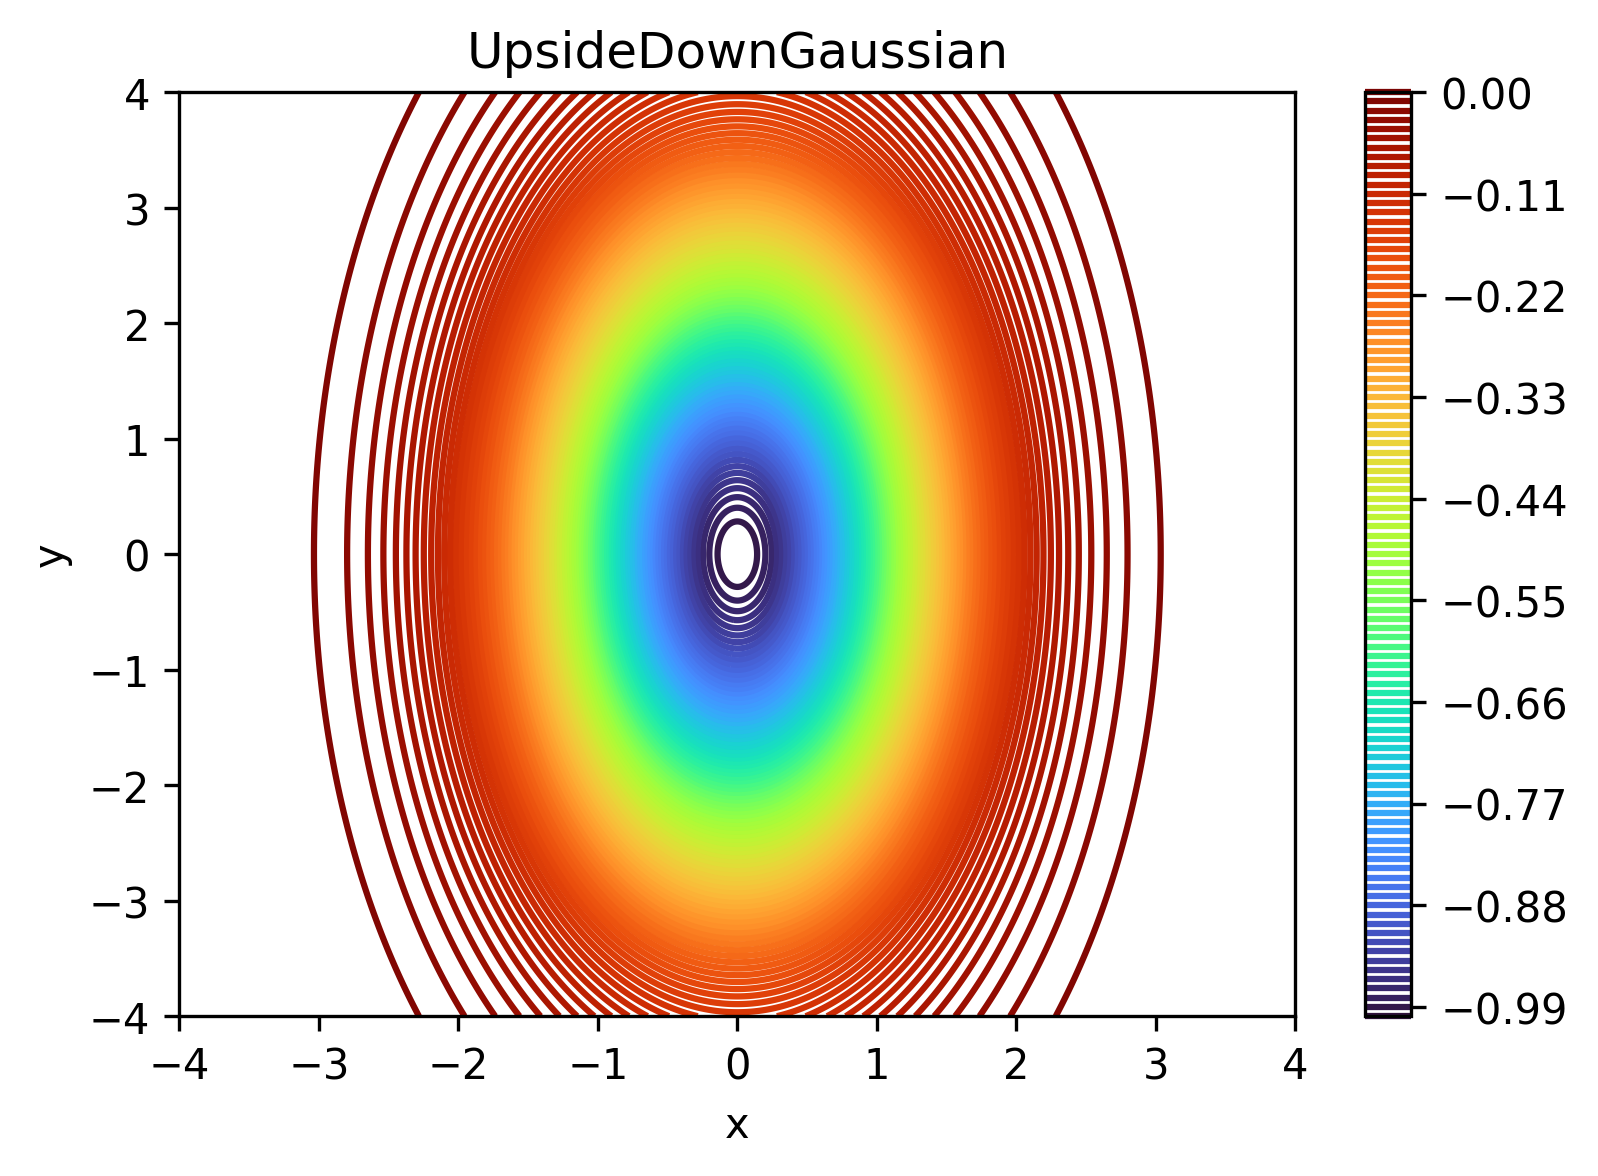

In [6]:
plt.figure(figsize=(6,4), dpi=300)
plt.contour(x, y, z1, 100, cmap='turbo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('UpsideDownGaussian')
plt.colorbar()

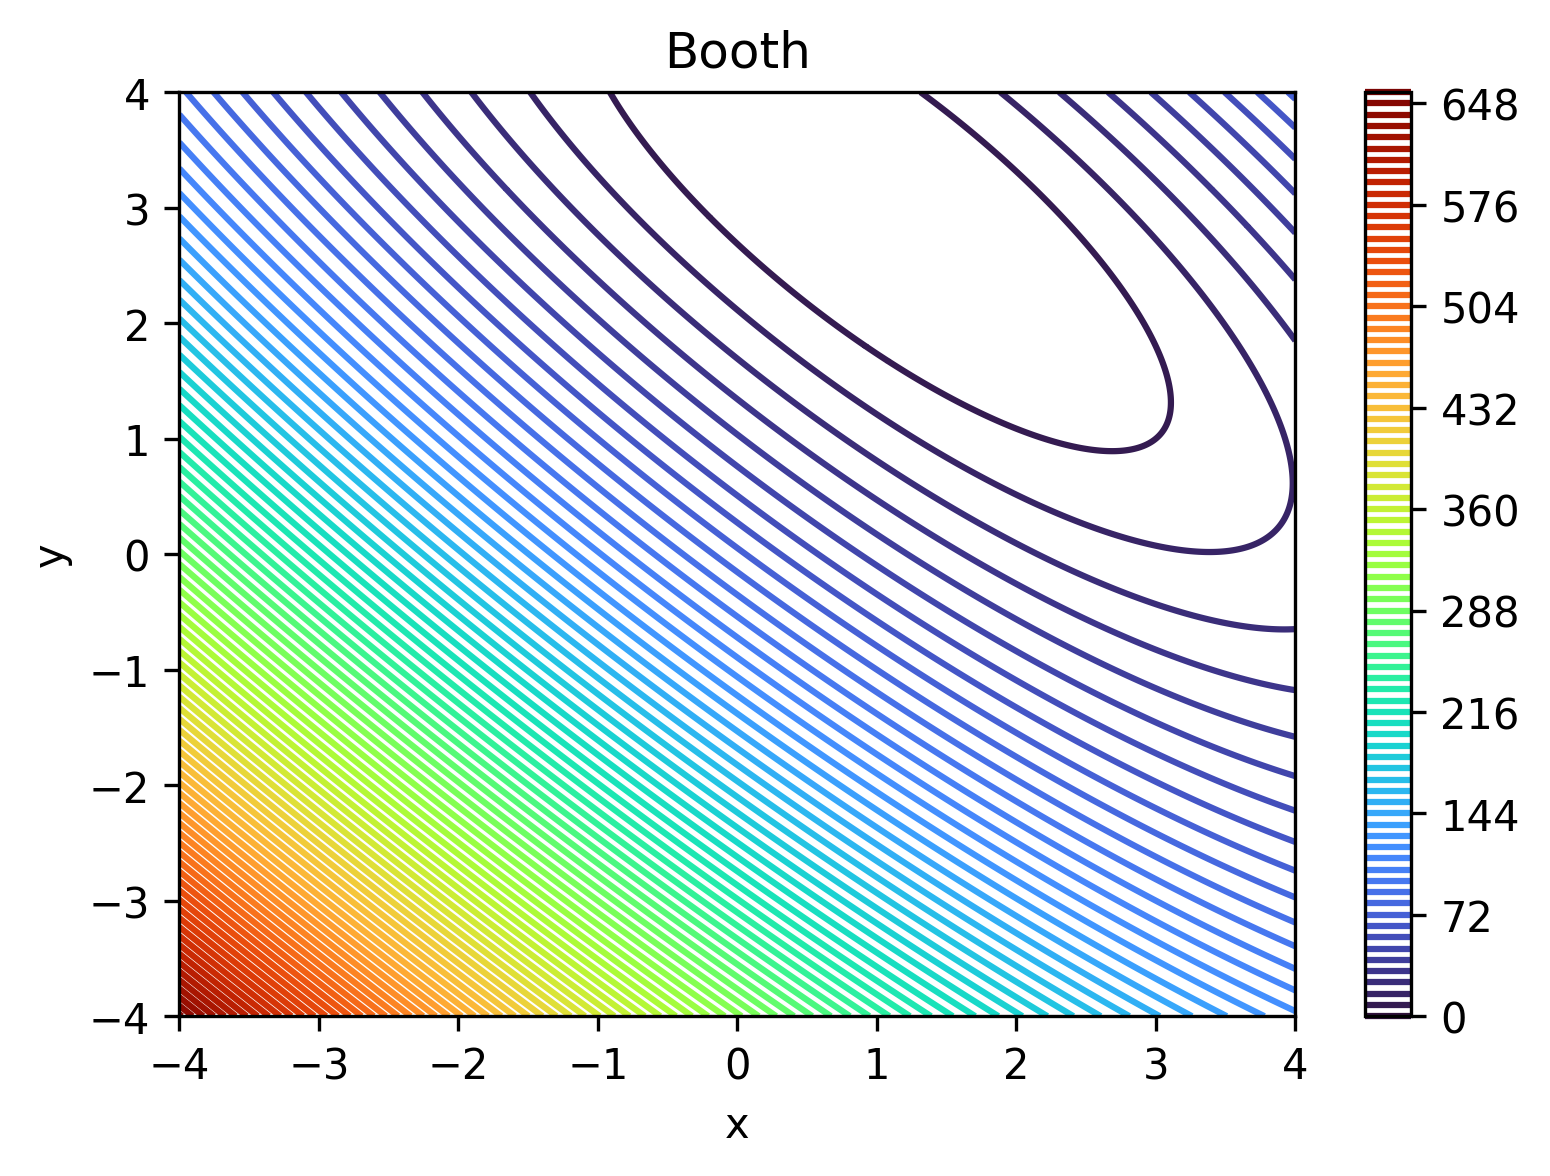

In [7]:
plt.figure(figsize=(6,4), dpi=300)
plt.contour(x, y, z2, 100, cmap='turbo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Booth')
plt.colorbar()

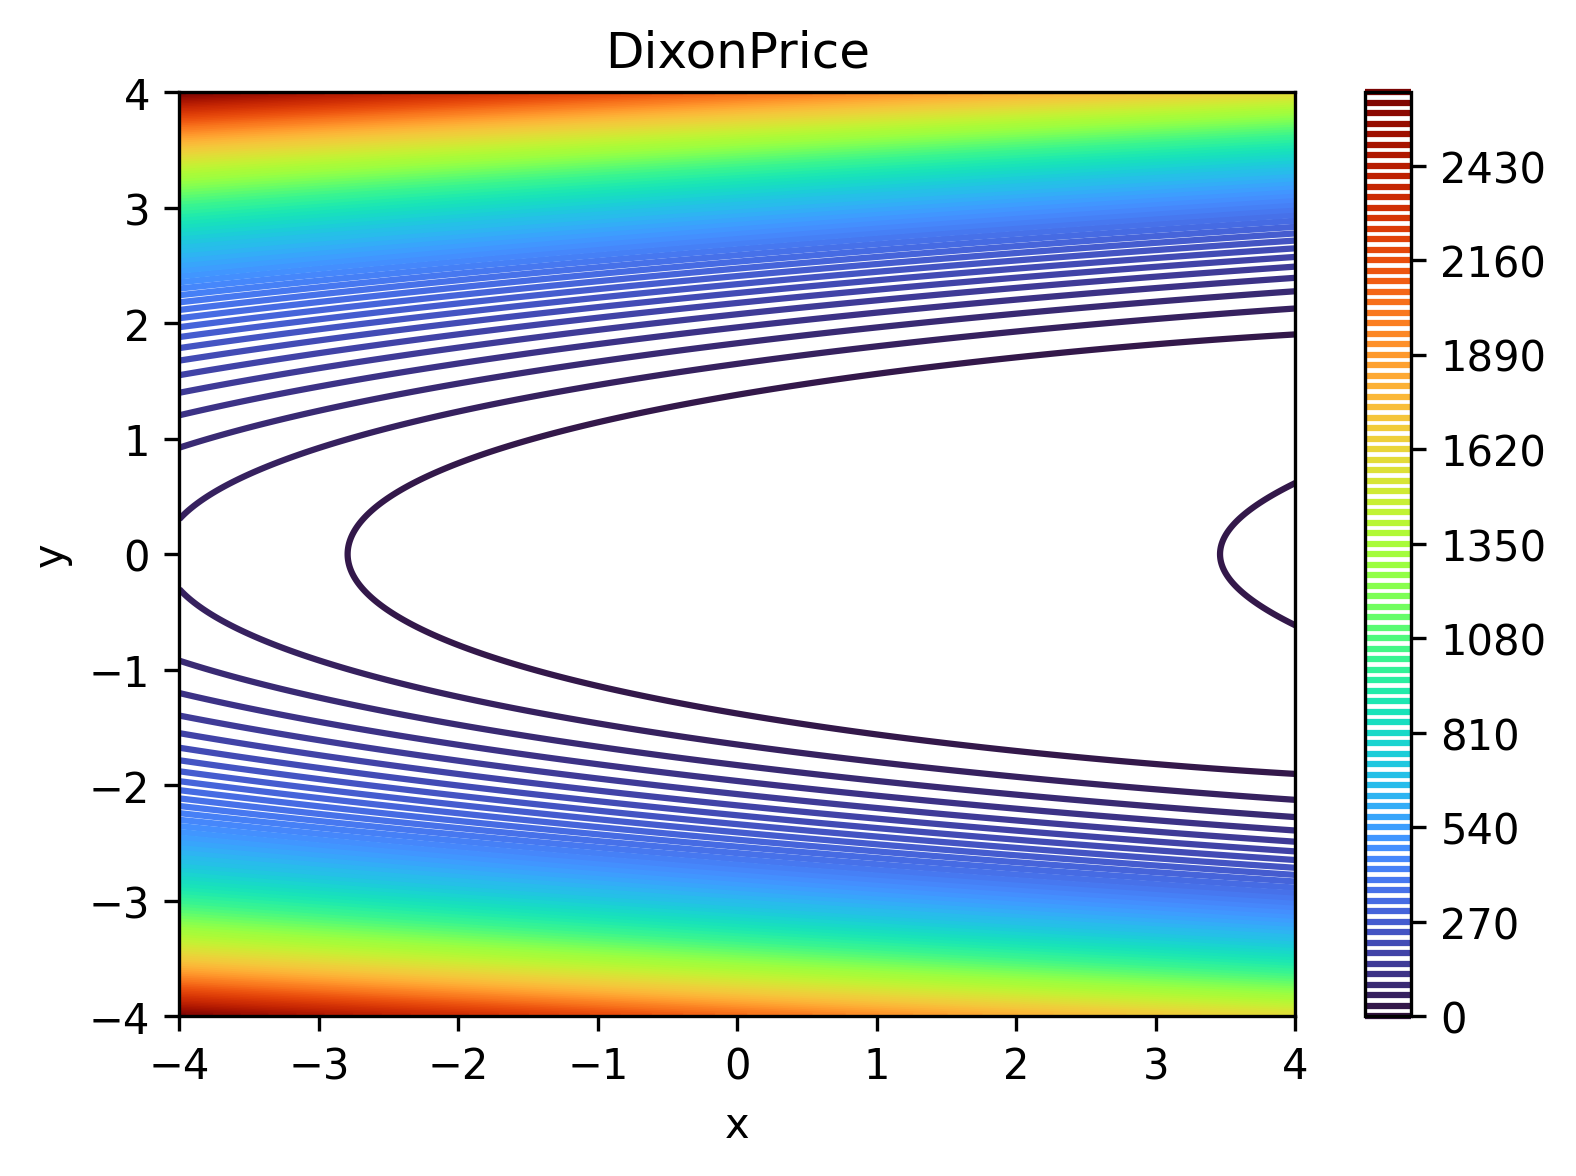

In [8]:
plt.figure(figsize=(6,4), dpi=300)
plt.contour(x, y, z3, 100, cmap='turbo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DixonPrice')
plt.colorbar()

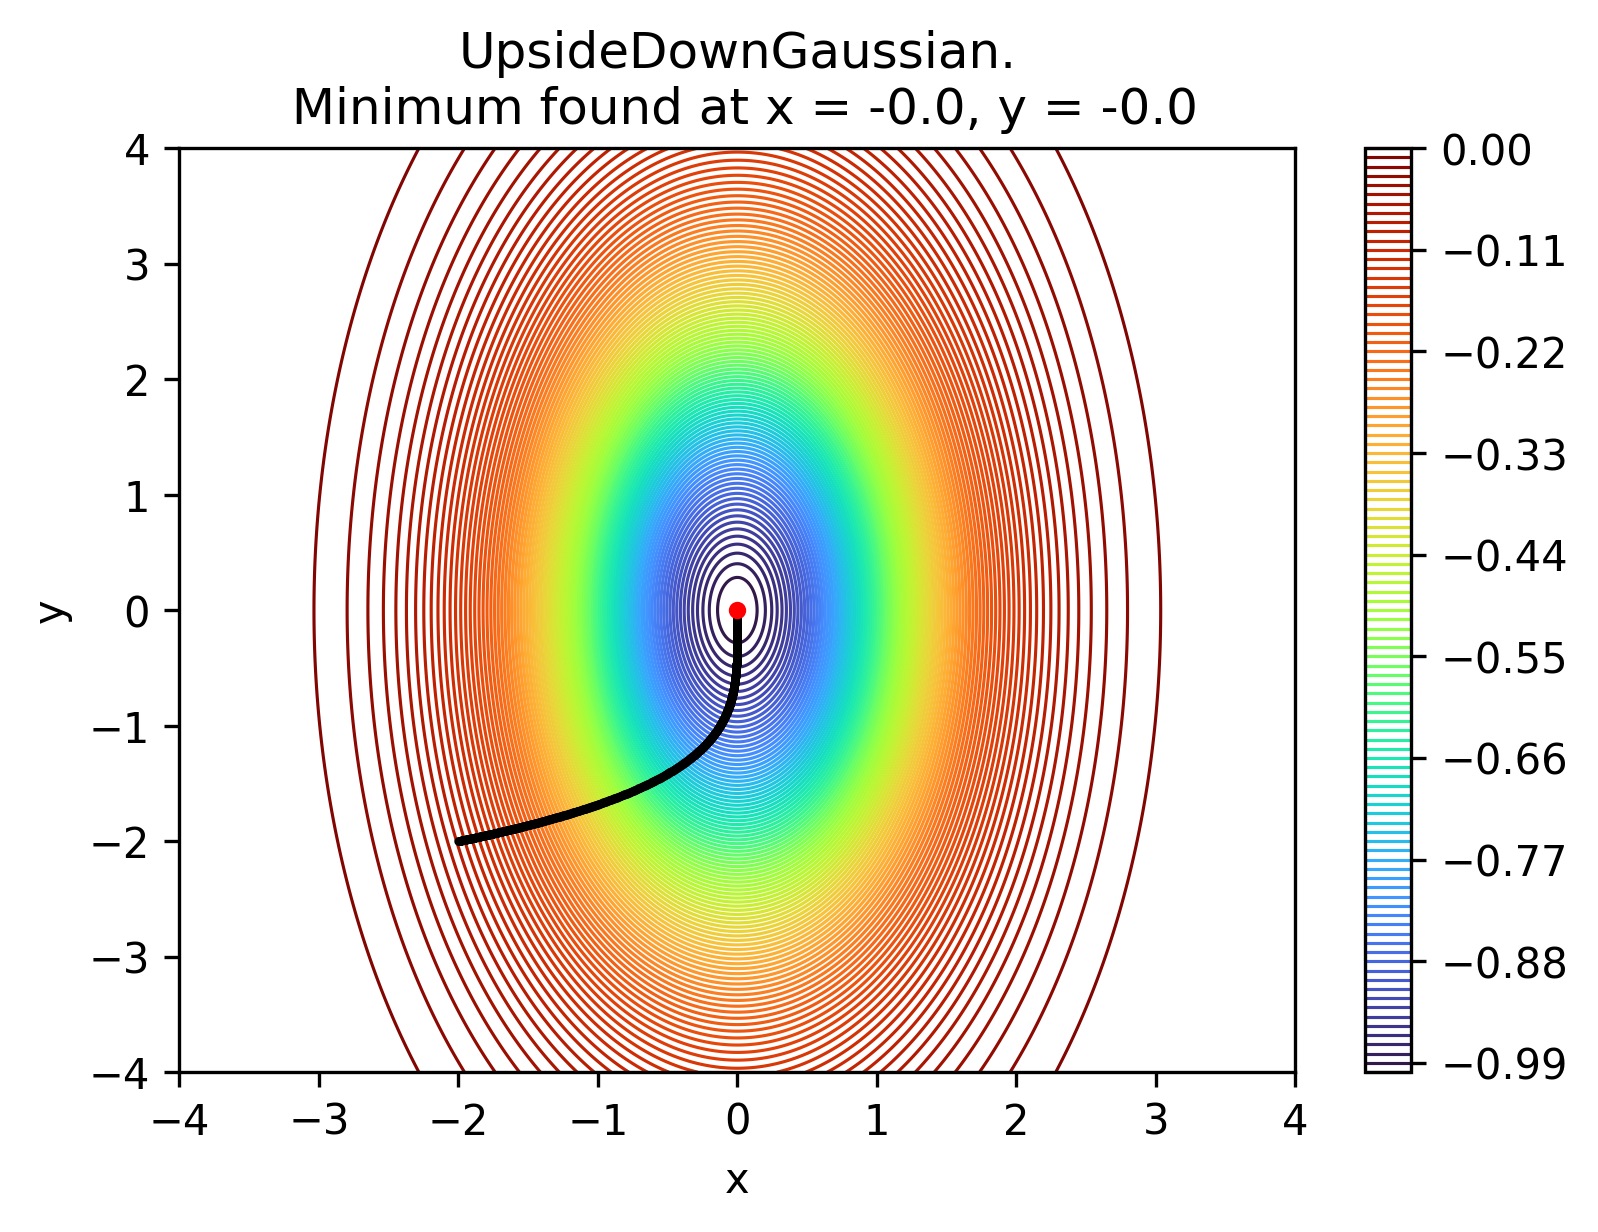

In [9]:
start = [[-2, -2]]
UDGPath = GradientDescent(UpsideDownGaussian, start, gama=0.01, dim=2, steps=4000)
x_min_UDG, y_min_UDG  = UDGPath[:, 0][-1], UDGPath[:, 1][-1]

plt.figure(figsize=(6,4), dpi=300)
plt.scatter(UDGPath[:, 0], UDGPath[:, 1], s=1, c='black', zorder=2)
plt.plot(UDGPath[:, 0], UDGPath[:, 1], lw=1, c='black', linestyle='--', zorder=1)
plt.scatter(x_min_UDG, y_min_UDG, s=10, c='red', zorder=3)
plt.contour(x, y, z1, 100, cmap='turbo', linewidths=0.75, zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'UpsideDownGaussian.\n Minimum found at x = {round(x_min_UDG, 3)}, y = {round(y_min_UDG, 3)}')
plt.colorbar()


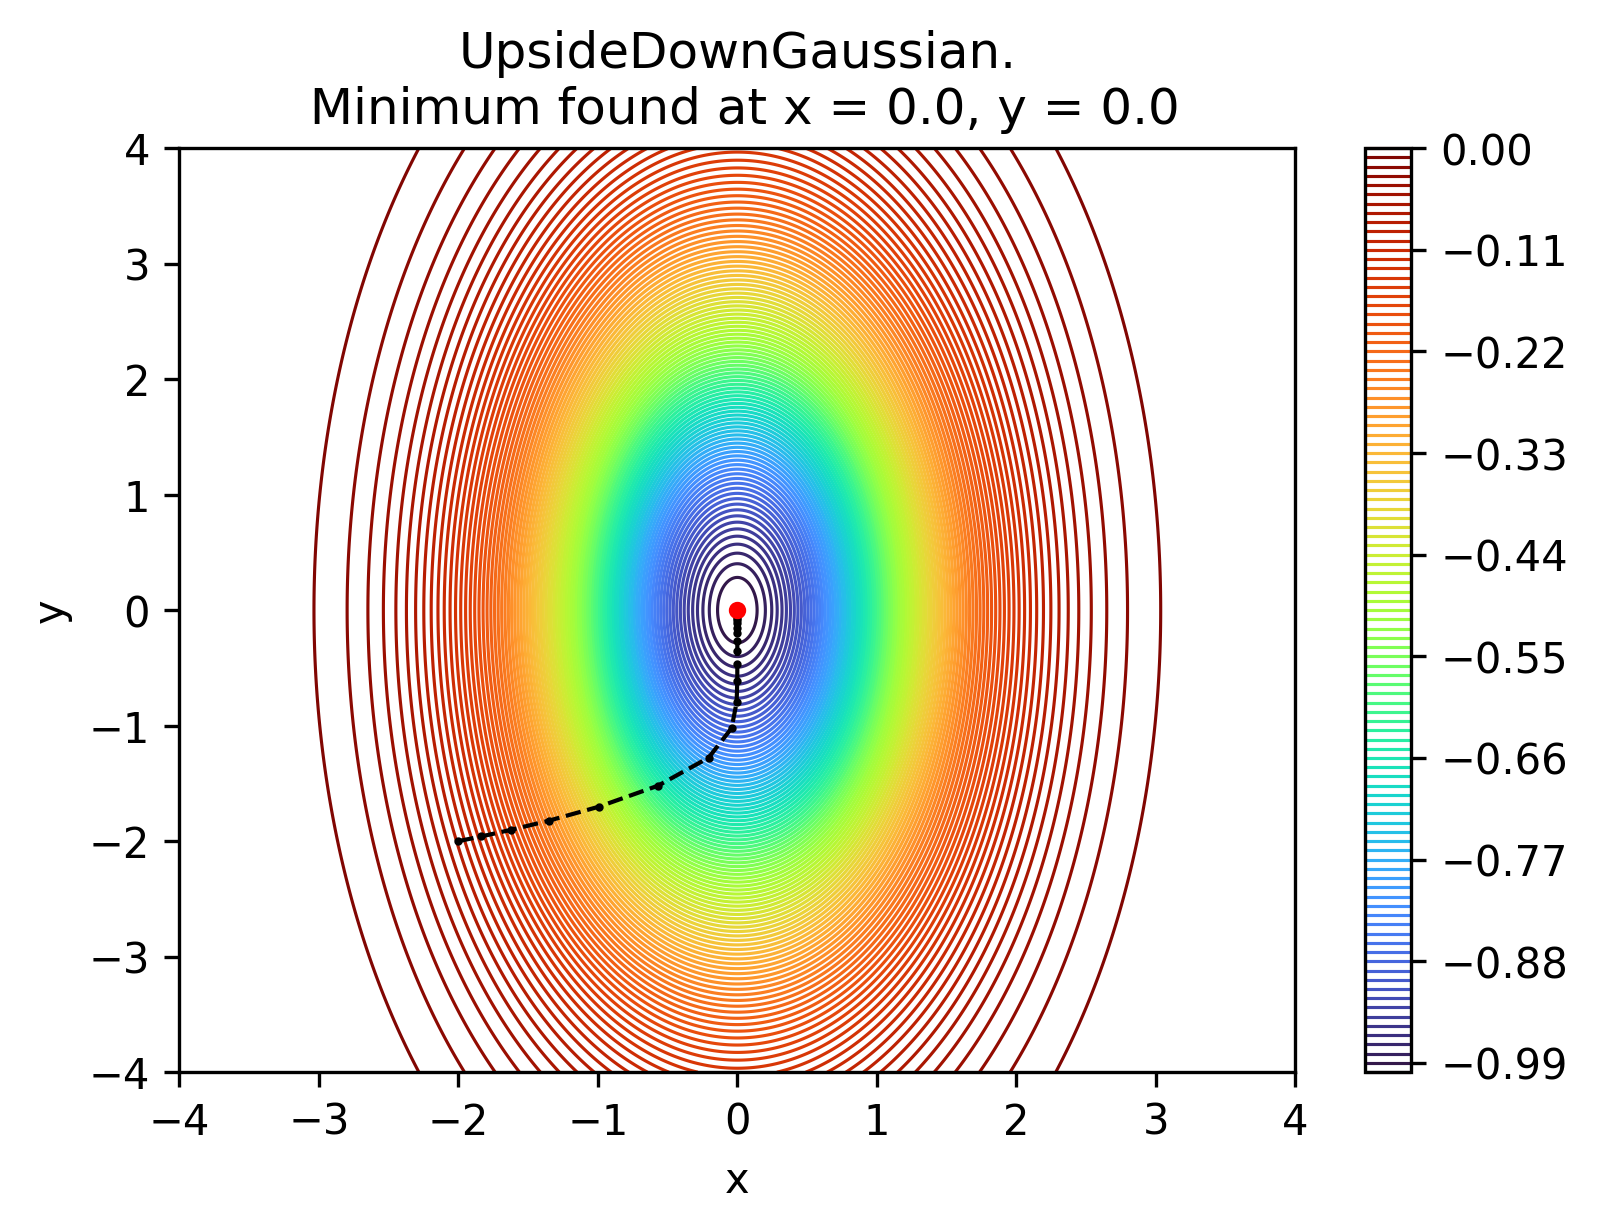

In [10]:
start = [[-2, -2]]
UDGPath = BacktrackingGradientDescent(UpsideDownGaussian, start, gama=1, steps=100)
x_min_UDG, y_min_UDG  = UDGPath[:, 0][-1], UDGPath[:, 1][-1]

plt.figure(figsize=(6,4), dpi=300)
plt.scatter(UDGPath[:, 0], UDGPath[:, 1], s=1, c='black', zorder=2)
plt.plot(UDGPath[:, 0], UDGPath[:, 1], lw=1, c='black', linestyle='--', zorder=1)
plt.scatter(x_min_UDG, y_min_UDG, s=10, c='red', zorder=3)
plt.contour(x, y, z1, 100, cmap='turbo', linewidths=0.75, zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'UpsideDownGaussian.\n Minimum found at x = {round(x_min_UDG, 3)}, y = {round(y_min_UDG, 3)}')
plt.colorbar()

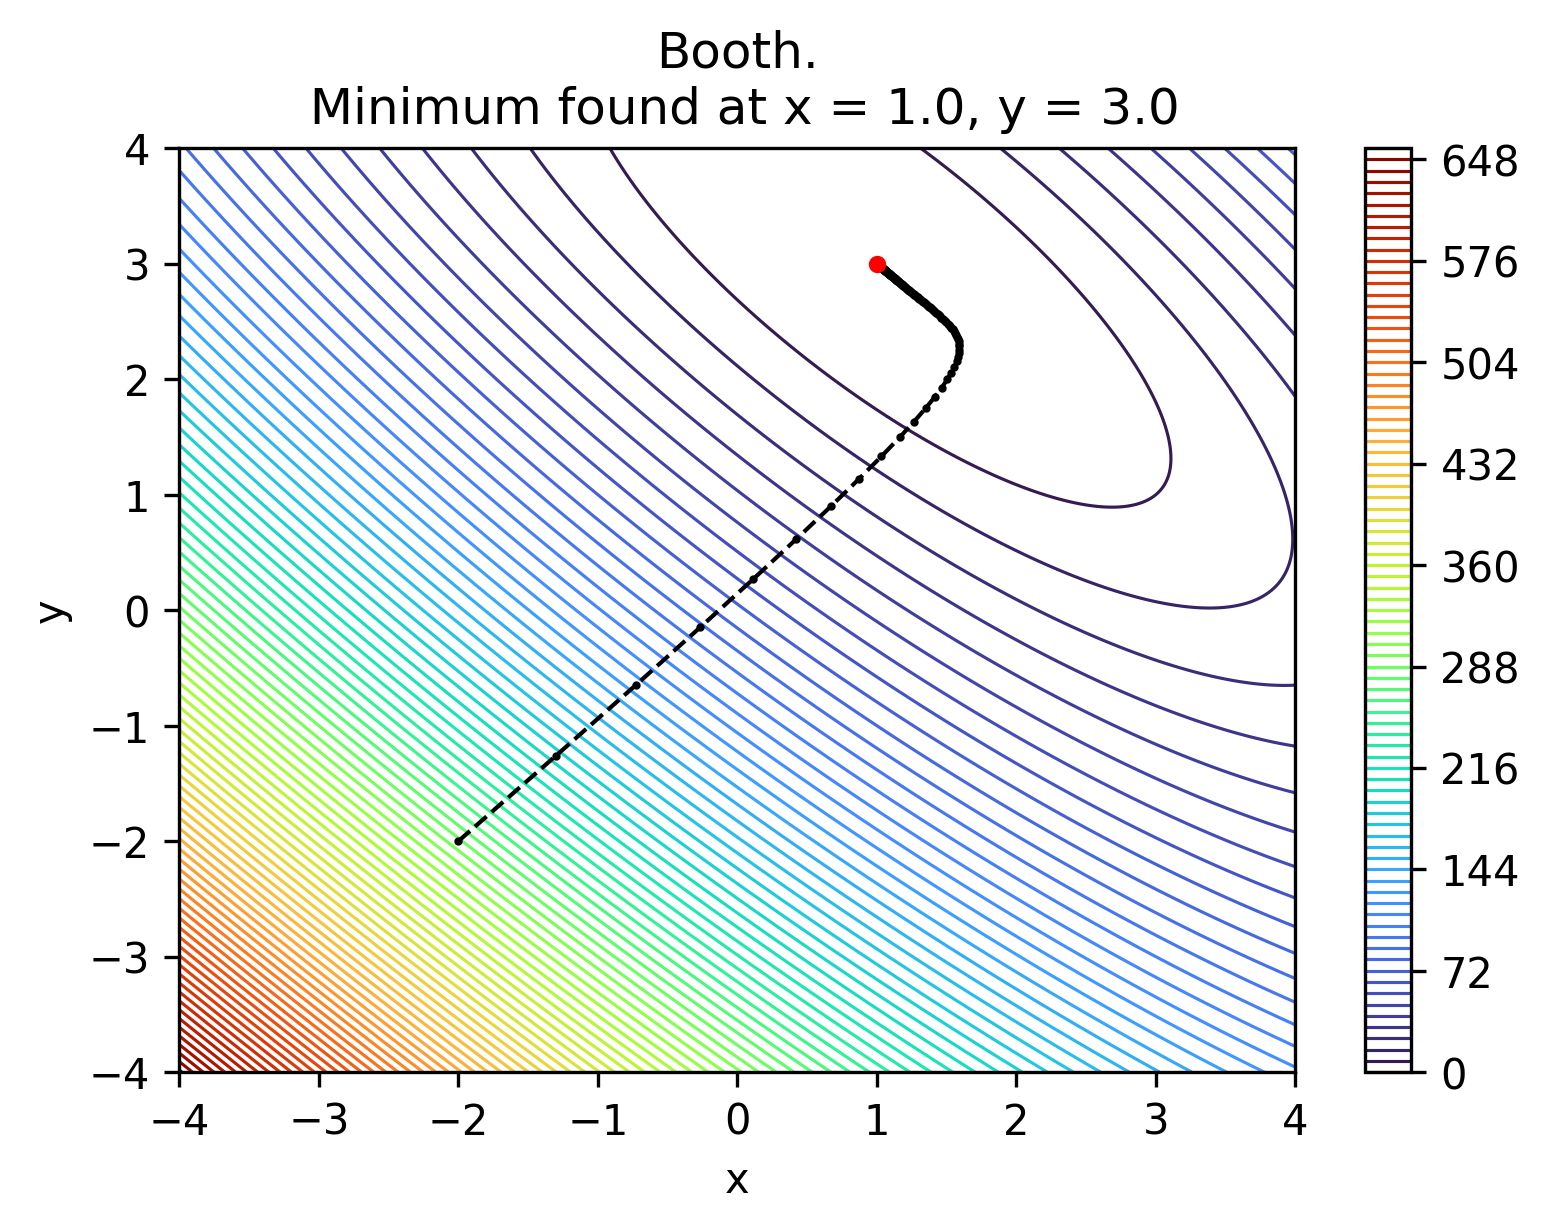

In [11]:
start = [[-2, -2]]
BPath = GradientDescent(Booth, start, gama=0.01, dim=2, steps=700)
x_min_B, y_min_B  = BPath[:, 0][-1], BPath[:, 1][-1]

plt.figure(figsize=(6,4), dpi=300)
plt.scatter(BPath[:, 0], BPath[:, 1], s=1, c='black', zorder=2)
plt.plot(BPath[:, 0], BPath[:, 1], lw=1, c='black', linestyle='--', zorder=1)
plt.scatter(x_min_B, y_min_B, s=10, c='red', zorder=3)
plt.contour(x, y, z2, 100, cmap='turbo', linewidths=0.75, zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Booth.\n Minimum found at x = {round(x_min_B, 3)}, y = {round(y_min_B, 3)}')
plt.colorbar()

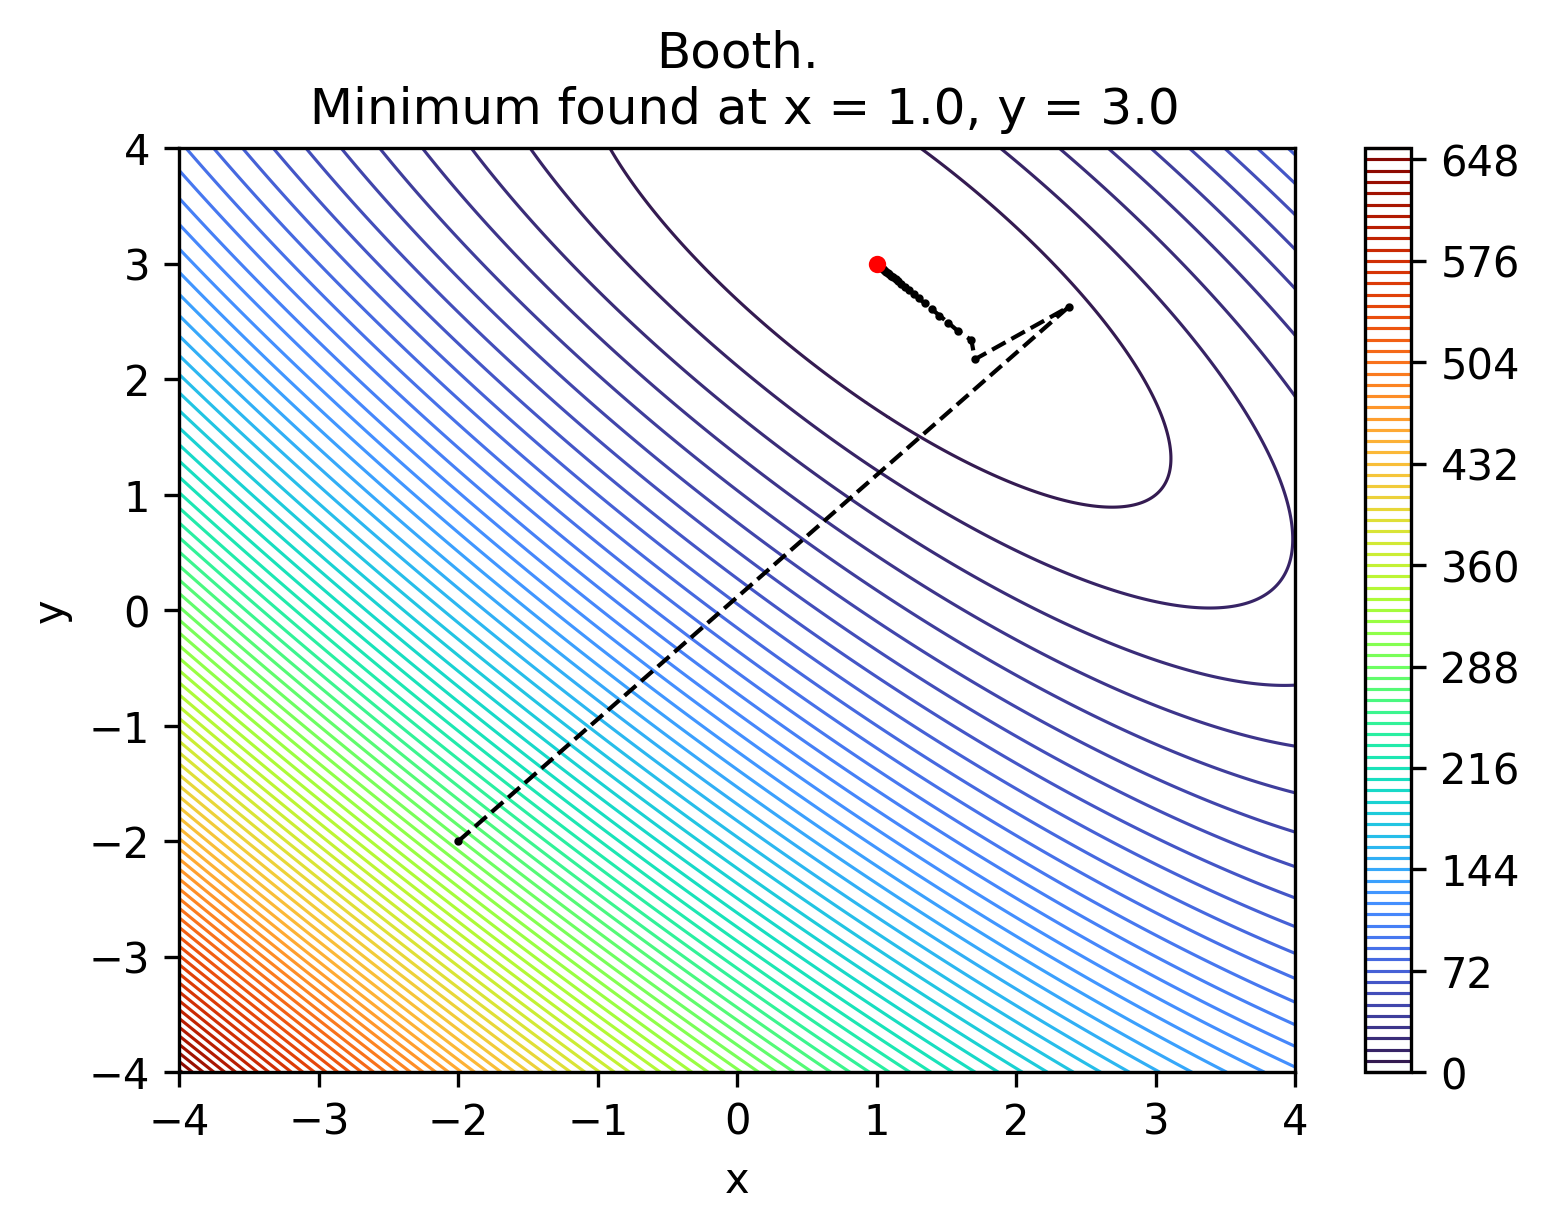

In [12]:
start = [[-2, -2]]
BPath = BacktrackingGradientDescent(Booth, start, gama=1, steps=70)
x_min_B, y_min_B  = BPath[:, 0][-1], BPath[:, 1][-1]

plt.figure(figsize=(6,4), dpi=300)
plt.scatter(BPath[:, 0], BPath[:, 1], s=1, c='black', zorder=2)
plt.plot(BPath[:, 0], BPath[:, 1], lw=1, c='black', linestyle='--', zorder=1)
plt.scatter(x_min_B, y_min_B, s=10, c='red', zorder=3)
plt.contour(x, y, z2, 100, cmap='turbo', linewidths=0.75, zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Booth.\n Minimum found at x = {round(x_min_B, 3)}, y = {round(y_min_B, 3)}')
plt.colorbar()

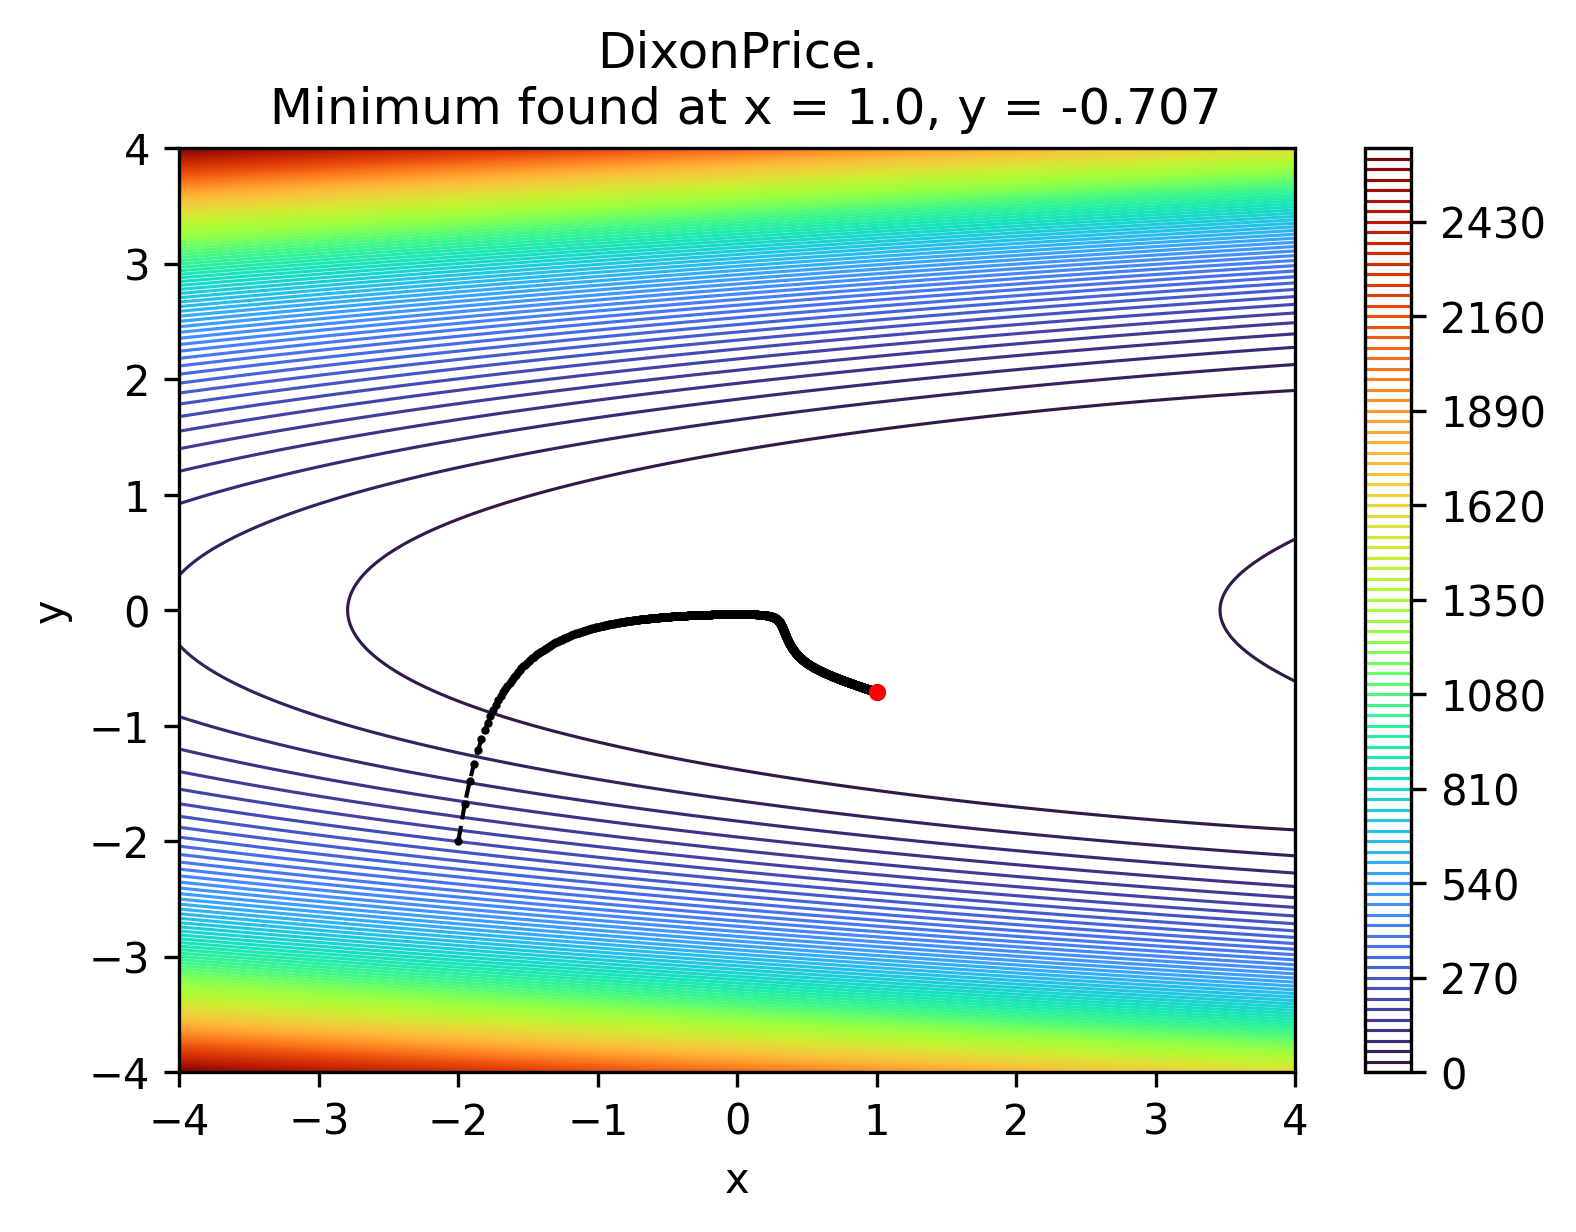

In [13]:
start = [[-2, -2]]
DPPath = GradientDescent(DixonPrice, start, gama=0.001, dim=2, steps=7000)
x_min_DP, y_min_DP  = DPPath[:, 0][-1], DPPath[:, 1][-1]

plt.figure(figsize=(6,4), dpi=300)
plt.scatter(DPPath[:, 0], DPPath[:, 1], s=1, c='black', zorder=2)
plt.plot(DPPath[:, 0], DPPath[:, 1], lw=1, c='black', linestyle='--', zorder=1)
plt.scatter(x_min_DP, y_min_DP, s=10, c='red', zorder=3)
plt.contour(x, y, z3, 100, cmap='turbo', linewidths=0.75, zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'DixonPrice.\n Minimum found at x = {round(x_min_DP, 3)}, y = {round(y_min_DP, 3)}')
plt.colorbar()

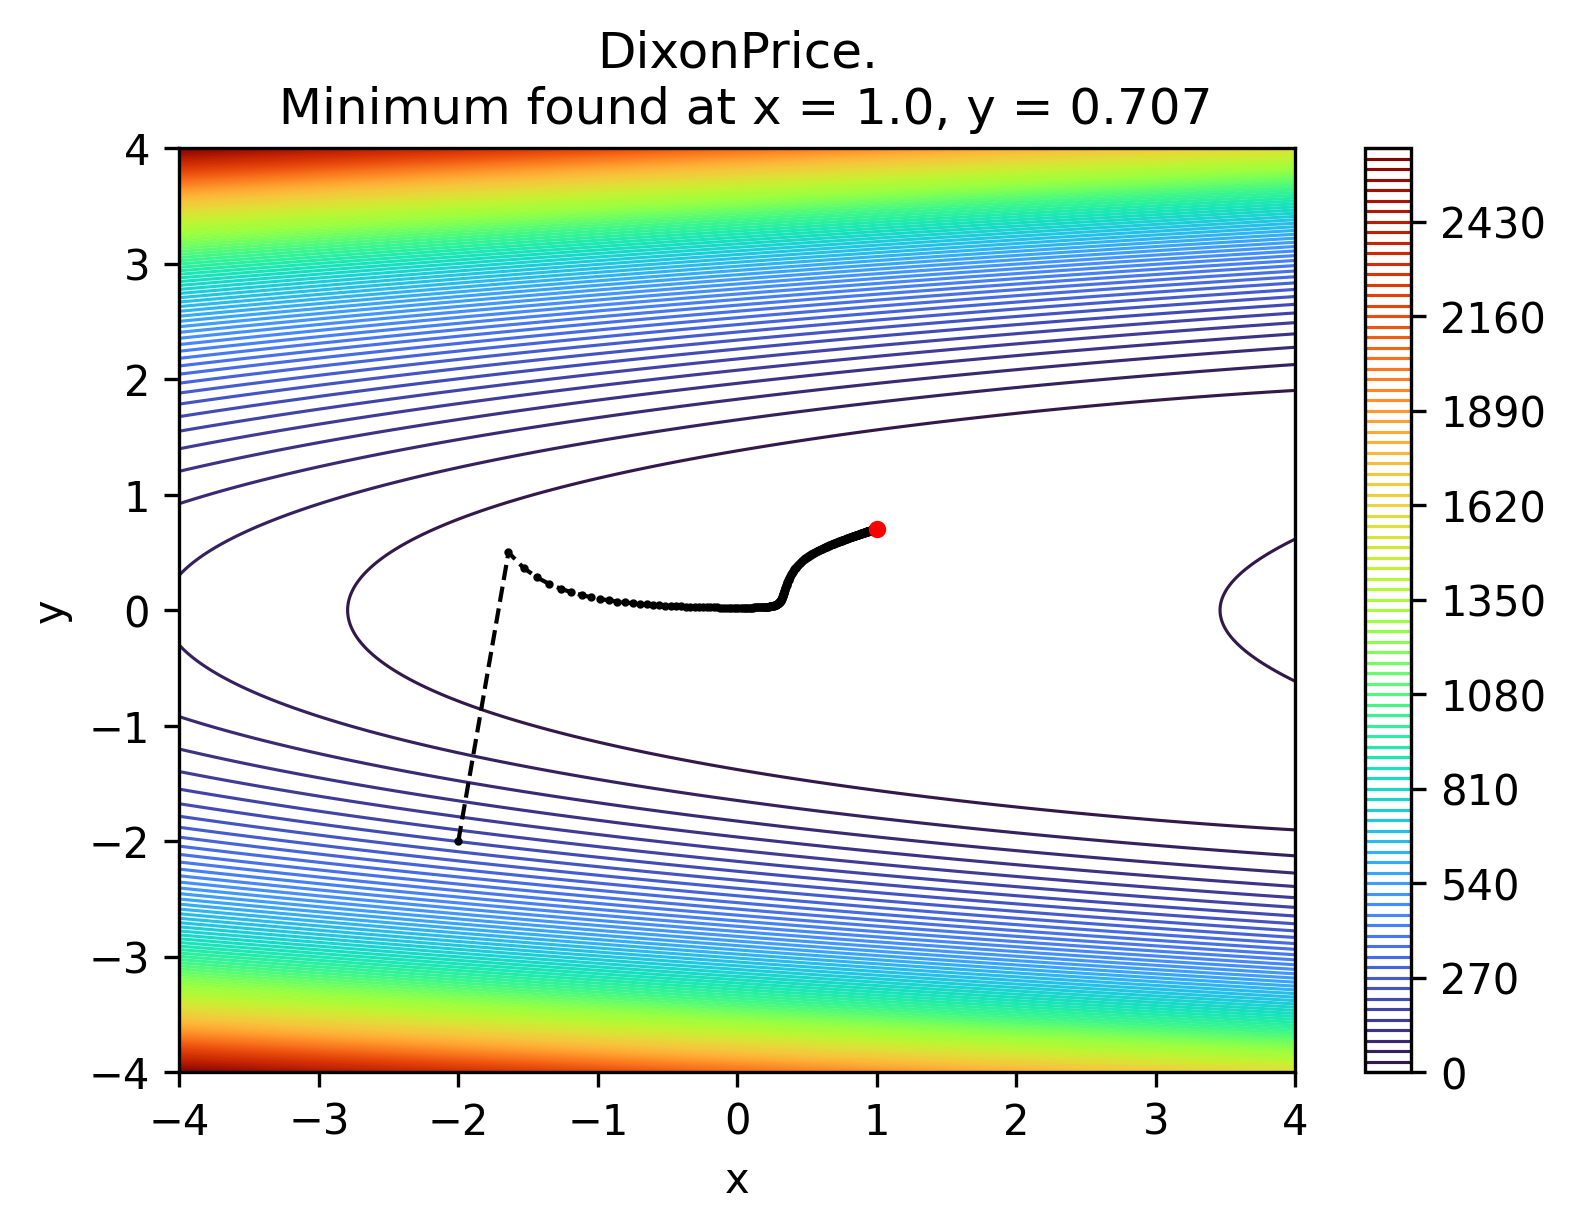

In [14]:
start = [[-2, -2]]
DPPath = BacktrackingGradientDescent(DixonPrice, start, gama=1, steps=700)
x_min_DP, y_min_DP  = DPPath[:, 0][-1], DPPath[:, 1][-1]
plt.figure(figsize=(6,4), dpi=300)
plt.scatter(DPPath[:, 0], DPPath[:, 1], s=1, c='black', zorder=2)
plt.plot(DPPath[:, 0], DPPath[:, 1], lw=1, c='black', linestyle='--', zorder=1)
plt.scatter(x_min_DP, y_min_DP, s=10, c='red', zorder=3)
plt.contour(x, y, z3, 100, cmap='turbo', linewidths=0.75, zorder=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'DixonPrice.\n Minimum found at x = {round(x_min_DP, 3)}, y = {round(y_min_DP, 3)}')
plt.colorbar()


In [15]:
grad = PartialDerivative(DixonPrice, x, y)

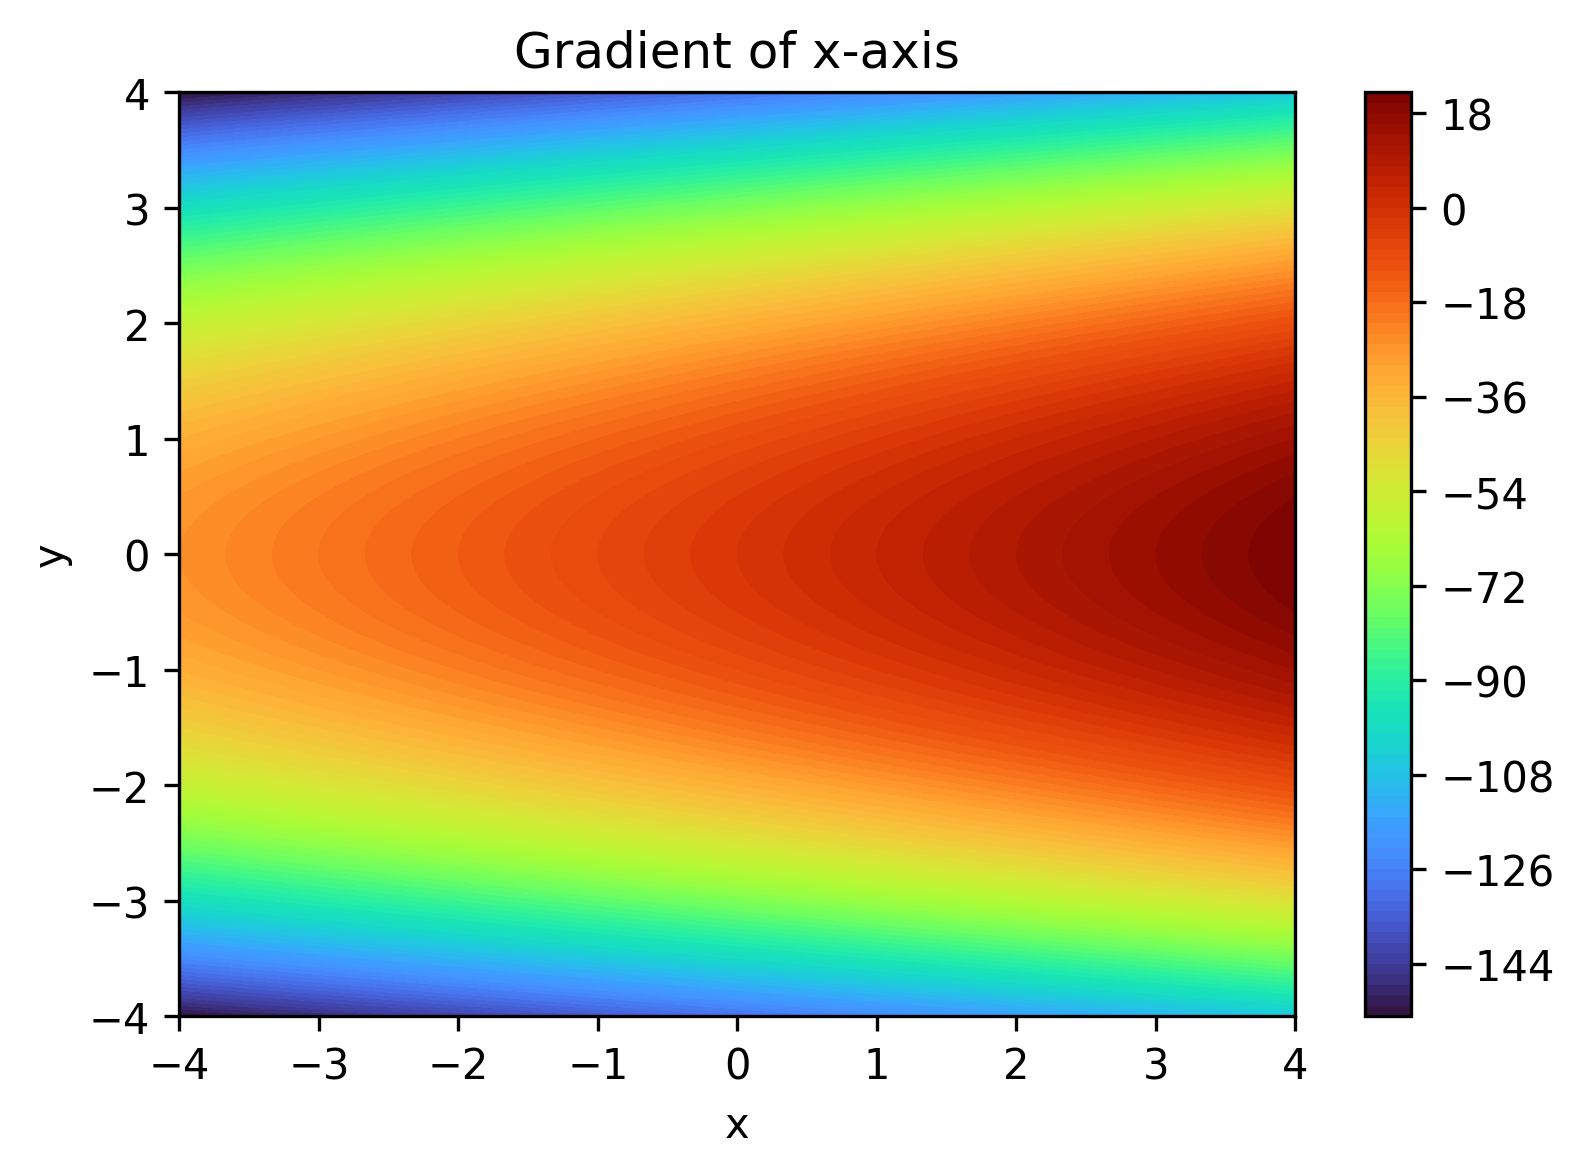

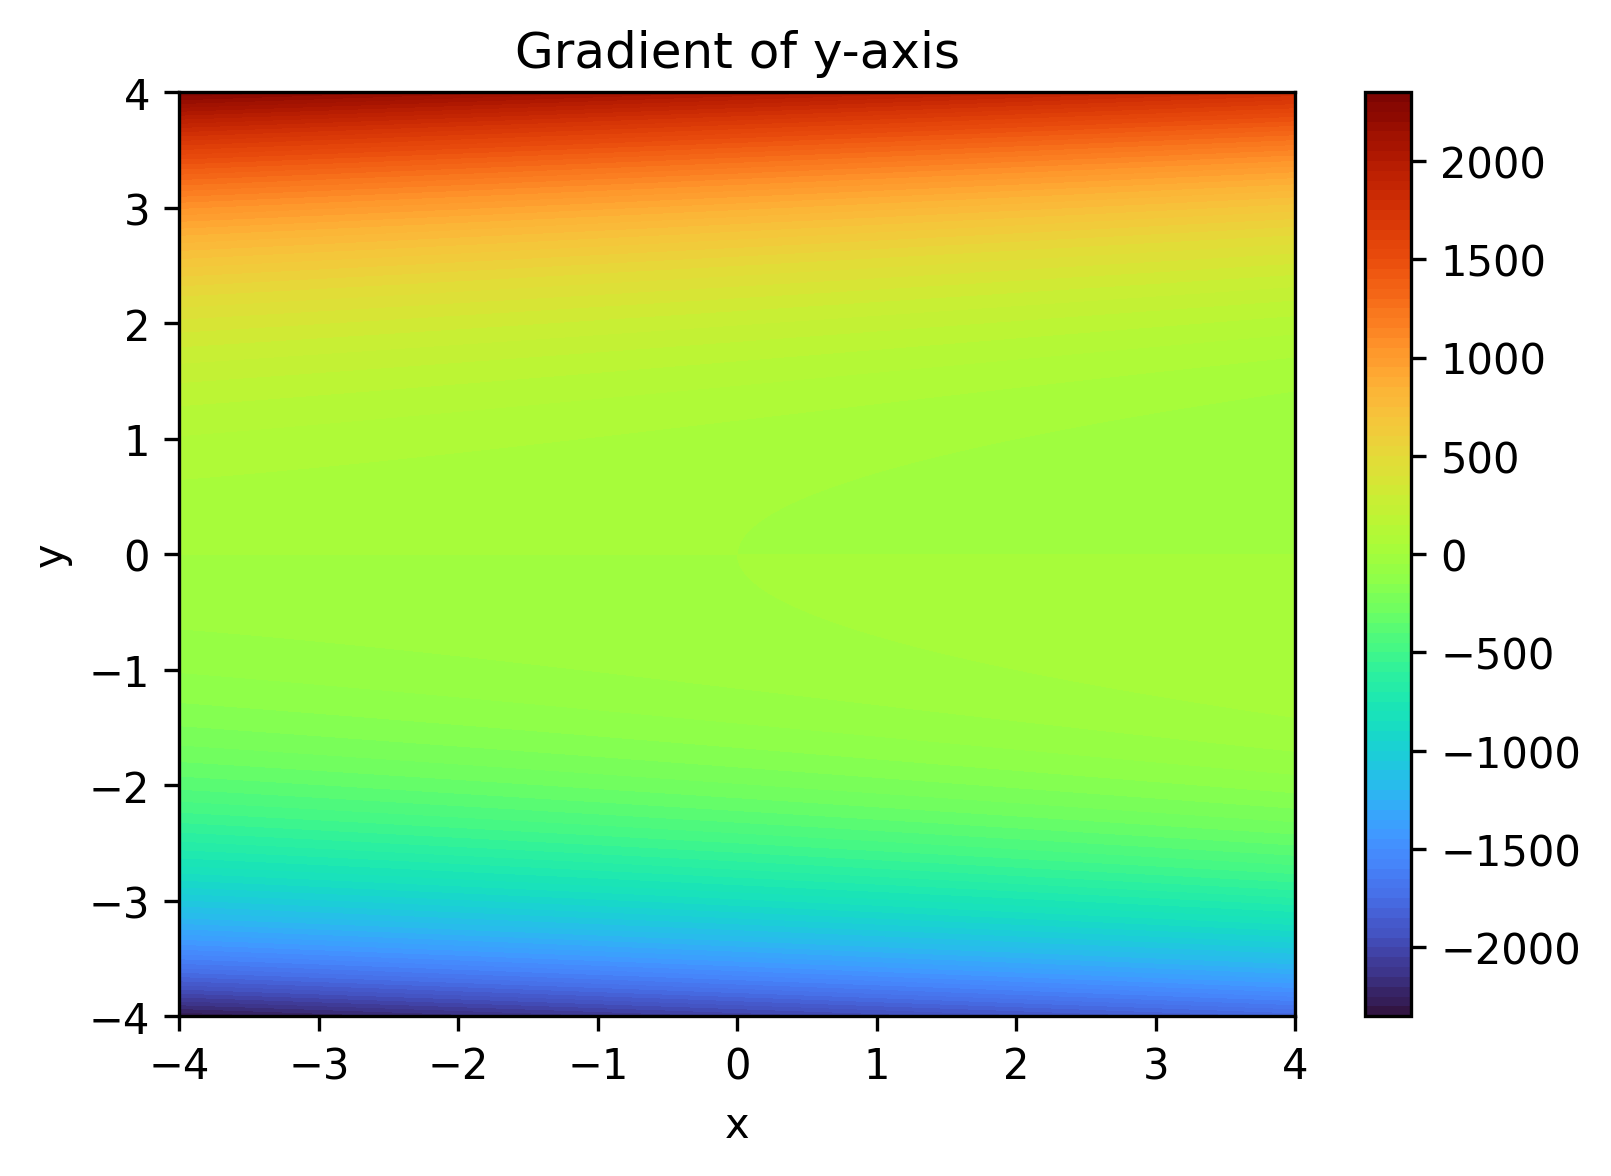

In [16]:
plt.figure(figsize=(6,4), dpi=300)
plt.contourf(x, y, grad[0], 100, cmap='turbo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient of x-axis')
plt.colorbar()

plt.figure(figsize=(6,4), dpi=300)
plt.contourf(x, y, grad[1], 100, cmap='turbo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient of y-axis')
plt.colorbar()
